# NLTK

1.	Write a Python script to tokenize a given sentence into words using NLTK.

In [14]:
from nltk.tokenize import sent_tokenize, word_tokenize

def tokenizing(sent):
    sentence_token = sent_tokenize(sent)
    print(sentence_token)
    word_token = word_tokenize(sent)
    print(word_token)

tokenizing("Hi. My name is srivatsala. I'm from Bangalore")


['Hi.', 'My name is srivatsala.', "I'm from Bangalore"]
['Hi', '.', 'My', 'name', 'is', 'srivatsala', '.', 'I', "'m", 'from', 'Bangalore']


2.	Create a function to remove stopwords from a given list of words using NLTK.

In [2]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def removes_stopwords(sentence):
    words = sentence.split()
    #print(words)
    filtered_words = [word for word in words if word.casefold() not in stop_words]
    filtered_sentence = " ".join(filtered_words)
    print(filtered_sentence)

removes_stopwords("The quick brown fox jumps over the lazy dog.")
removes_stopwords("She sells seashells by the seashore.")
removes_stopwords("A journey of a thousand miles begins with a single step.")
removes_stopwords("To be or not to be, that is the question.")
removes_stopwords("All that glitters is not gold.")


quick brown fox jumps lazy dog.
sells seashells seashore.
journey thousand miles begins single step.
be, question.
glitters gold.


3.	Tokenize a paragraph into sentences using NLTK.

In [24]:
from nltk.tokenize import sent_tokenize, word_tokenize

paragraph = "Generating random paragraphs can be an excellent way for writers to get their creative flow going at the beginning of the day.The writer has no idea what topic the random paragraph will be about when it appears. This forces the writer to use creativity to complete one of three common writing challenges. The writer can use the paragraph as the first one of a short story and build upon it. A second option is to use the random paragraph somewhere in a short story they create. The third option is to have the random paragraph be the ending paragraph in a short story. No matter which of these challenges is undertaken, the writer is forced to use creativity to incorporate the paragraph into their writing."
sentences = sent_tokenize(paragraph)
words = word_tokenize(paragraph)
print(sentences)
print('\n')
print('------' *50)
print(words)

['Generating random paragraphs can be an excellent way for writers to get their creative flow going at the beginning of the day.The writer has no idea what topic the random paragraph will be about when it appears.', 'This forces the writer to use creativity to complete one of three common writing challenges.', 'The writer can use the paragraph as the first one of a short story and build upon it.', 'A second option is to use the random paragraph somewhere in a short story they create.', 'The third option is to have the random paragraph be the ending paragraph in a short story.', 'No matter which of these challenges is undertaken, the writer is forced to use creativity to incorporate the paragraph into their writing.']


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

4.	Write a script to find the frequency distribution of words in a given text, excluding stopwords.

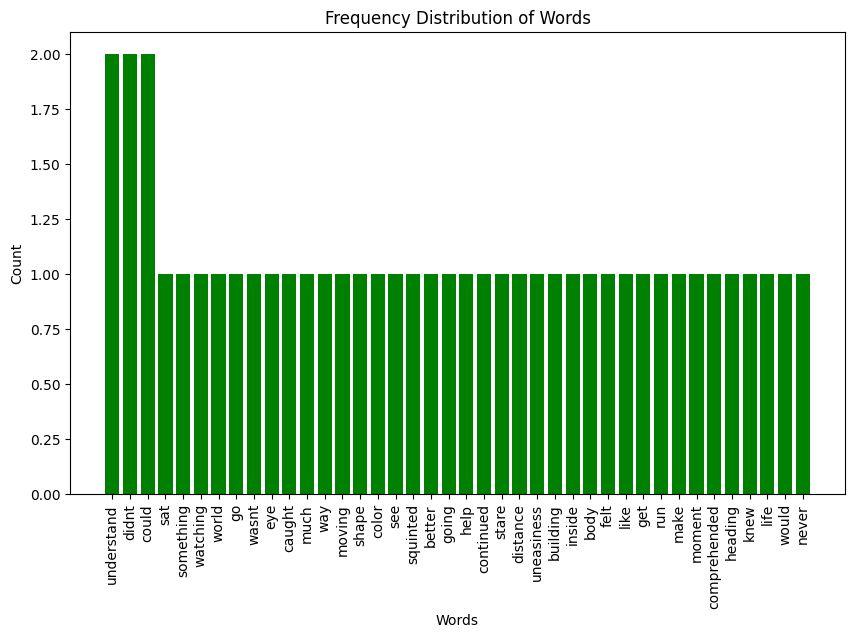

In [36]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import string

sentence = "As she sat watching the world go by, something caught her eye. It wasn't so much its color or shape, but the way it was moving. She squinted to see if she could better understand what it was and where it was going, but it didn't help. As she continued to stare into the distance, she didn't understand why this uneasiness was building inside her body. She felt like she should get up and run. If only she could make out what it was. At that moment, she comprehended what it was and where it was heading, and she knew her life would never be the same." 
text = sentence.translate(str.maketrans("","",string.punctuation))
token = word_tokenize(text)
stop = set(stopwords.words("English"))
filtered = [word for word in token if word.casefold() not in stop]
word_counts = pd.Series(filtered).value_counts()
word_df = pd.DataFrame(word_counts).reset_index()
word_df.columns = ['Word', 'Count']

plt.figure(figsize=(10, 6))
plt.bar(word_df['Word'], word_df['Count'], color='g')
plt.title("Frequency Distribution of Words")
plt.xlabel("Words")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()
    

In [37]:
from collections import Counter
import re
from nltk.corpus import stopwords

def word_frequency(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation and split into words
    words = re.findall(r'\b\w+\b', text)
    
    # Load stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words]
    
    # Count word frequencies
    word_counts = Counter(filtered_words)
    
    return word_counts

# Example usage
text = """In a village of La Mancha, the name of which I have no desire to call to mind, there lived not long since one of those gentlemen that keep a lance in the lance-rack, an old buckler, a lean hack, and a greyhound for coursing."""
print(word_frequency(text))


Counter({'lance': 2, 'village': 1, 'la': 1, 'mancha': 1, 'name': 1, 'desire': 1, 'call': 1, 'mind': 1, 'lived': 1, 'long': 1, 'since': 1, 'one': 1, 'gentlemen': 1, 'keep': 1, 'rack': 1, 'old': 1, 'buckler': 1, 'lean': 1, 'hack': 1, 'greyhound': 1, 'coursing': 1})


5.	Create a function that tokenizes a text into words and removes punctuation using NLTK.

In [42]:
import re
from nltk.tokenize import word_tokenize

text = "Hi . My name is SrivatsalA .  K . A . , , ( ) $ % ^ 7 * # @ !"

words = word_tokenize(text)

punctuations  = re.compile("^[^A-Za-z0-9]$")

filtered_words = []

for word in words:
    result = punctuations.search(word)  #re.match
    if not result:
        filtered_words.append(word)
        

print(filtered_words)

['Hi', 'My', 'name', 'is', 'SrivatsalA', 'K', 'A', '7']


In [9]:
from itertools import permutations
from nltk.corpus import words

validwords = set(words.words())

def is_anagrams(word):
    perms = [''.join(w) for w in permutations(word)]
    anagram = set(perms) & validwords
    print(anagram)

is_anagrams('civic')

{'civic'}


# Sklearn - LatentDirichletAllocation, Feature Extraction  

1.	Implement a simple Latent Dirichlet Allocation (LDA) model using sklearn on a small text dataset.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import LatentDirichletAllocation

data = {
    'text': [
        'I love programming in Python',
        'Python is a great language',
        'I enjoy learning new things',
        'Machine learning is fascinating',
        'Data science is an interesting field'
    ]
}

df = pd.DataFrame(data)
documents = df['text'].tolist()  #convert a Series or DataFrame column into a Python list.

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')  #matches sequences of word characters (letters, digits, and underscores),

# Vectorize document using CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english', tokenizer=tokenizer.tokenize)
X = vectorizer.fit_transform(documents)

# Define the number of topics
num_topics = 2

# Create LDA object
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(X)

# Display the topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
feature_names = vectorizer.get_feature_names_out()
display_topics(lda, feature_names, no_top_words)


Topic 0:
python programming love great language
Topic 1:
learning things new enjoy field


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


2.	Write a script to extract features from text data using sklearn’s CountVectorizer.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents
documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer to the documents and transform the documents into a document-term matrix
X = vectorizer.fit_transform(documents)

# Get the feature names (tokens)
feature_names = vectorizer.get_feature_names_out()

# Print the feature names
print("Feature names:", feature_names)

# Print the document-term matrix
print("Document-term matrix:\n", X.toarray())

# A document-term matrix (DTM) is a mathematical representation of a collection of documents. In this matrix:

# Rows represent individual documents.
# Columns represent unique terms (words) from the entire collection of documents.
# Values in the matrix indicate the frequency of each term in each document.


Feature names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
Document-term matrix:
 [[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


3.	Use sklearn’s TfidfVectorizer to transform a set of documents into TF-IDF features.

TF-IDF, which stands for Term Frequency-Inverse Document Frequency. It’s a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus).

The idea is that words that are common in a document but rare in the entire corpus get higher TF-IDF scores, making them more significant for identifying the document’s unique content

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

documents = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

# Create an instance of TfidfVectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the documents and transform the documents into a TF-IDF matrix
X = vectorizer.fit_transform(documents)


feature_names = vectorizer.get_feature_names_out()


print("Feature names:", feature_names)


print("TF-IDF matrix:\n", X.toarray())


Feature names: ['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']
TF-IDF matrix:
 [[0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]
 [0.         0.6876236  0.         0.28108867 0.         0.53864762
  0.28108867 0.         0.28108867]
 [0.51184851 0.         0.         0.26710379 0.51184851 0.
  0.26710379 0.51184851 0.26710379]
 [0.         0.46979139 0.58028582 0.38408524 0.         0.
  0.38408524 0.         0.38408524]]


4.	Create a function to fit an LDA model and print the top words for each topic.

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from sklearn.feature_extraction.text import CountVectorizer

def fit_lda_model(documents, num_topics=5, num_words=10):
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)
    
    # Convert the vectorized documents to a gensim corpus
    corpus = gensim.matutils.Sparse2Corpus(X, documents_columns=False)
    
    # Create a dictionary mapping from word IDs to words
    id_map = {v: k for k, v in vectorizer.vocabulary_.items()}
    
    # Fit the LDA model
    lda_model = LdaModel(corpus=corpus, id2word=id_map, num_topics=num_topics, passes=10, random_state=42)
    
    # Print the top words for each topic
    for idx, topic in lda_model.print_topics(num_topics=num_topics, num_words=num_words):
        print(f"Topic {idx}: {topic}")

# Example usage
documents = [
    "The economy is working better than ever.",
    "The new movie was amazing and thrilling.",
    "The government is planning new policies.",
    "The sports event was exciting and fun.",
    "Technology is advancing at a rapid pace."
]

fit_lda_model(documents)

# Corpus: A large and structured set of texts that a machine can read. In Gensim, it’s a collection of document objects1.
# Role: It serves as the input for training models. During training, the models use this corpus to identify common themes and topics,
#initializing their internal parameters

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def fit_lda_model(documents, num_topics=5, num_words=10):
    # Vectorize the documents
    vectorizer = CountVectorizer(stop_words='english')
    X = vectorizer.fit_transform(documents)
    
    # Fit the LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(X)
    
    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    
    # Print the top words for each topic
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]))

# Example usage
documents = [
    "The economy is working better than ever.",
    "The new movie was amazing and thrilling.",
    "The government is planning new policies.",
    "The sports event was exciting and fun.",
    "Technology is advancing at a rapid pace."
]

fit_lda_model(documents)


# Libraries like os 

In [28]:
import os
print(os.getcwd())

C:\Users\hp\Jupyter\My Python Practice


In [ ]:
# os.chdir("c:\Python") tO CHANGE THE WORKING DIRECTORY 

In [29]:
files = os.listdir(os.getcwd())

In [ ]:
os.mkdir("pictures") #to create new foler or direcoty
os.mkdirs("pictures/trip/nov") #multiple directory one inside another

In [ ]:
os.rmdir("pictures") #delete a directory

In [ ]:
cur_folder = os.getcwd()
file1 = 'text.txt'
combined = os.path.join(cur_folder, file1)
print(combined)

In [ ]:
cur_folder = os.getcwd()
file1 = 'text.txt'
combined = os.path.join(cur_folder, "folder1", "current folder", file1)
print(combined)
print(os.path.exists(combined))
print(os.path.isfile(combined)) 
print(os.path.isdir(combined))

print(os.stat(combined))
print(os.stat(combined).st_size)

In [ ]:
v = os.environ.get("PATH")
print(v)

In [ ]:
print(os.getlogin())

1.	Write a Python script to list all files and directories in a given directory using the os library

In [30]:
import os

current_dir = os.getcwd()
result = os.listdir(current_dir)
print(result)

['.ipynb_checkpoints', '01.ipynb', '02.ipynb', '03.ipynb', 'Dog_random.jpg', 'Dog_random.webp', 'My_image.png', 'My_image.webp']


2.	Create a function to check if a given path is a file or a directory using the os library.  

In [32]:
import os

print(os.path.isfile(current_dir))
print(os.path.isdir(current_dir))

False
True


3.	Write a script to create a new directory and a new file within that directory using the os library. 

In [34]:
import os
result = os.makedirs("OS lib test folder/folder1/file1")
print(result)

None


In [36]:
os.rmdir("OS lib test folder/folder1/file1")

In [39]:
import os

folder_path = "OS_lib_test_folder"
os.mkdir(folder_path)

file_name = "text2.txt"

result = os.path.join(folder_path, file_name)

print(result)


OS_lib_test_folder\text2.txt


4.	Implement a function to rename a file in a given directory using the os library.  

In [46]:
os.makedirs("OS_lib_test_folder/text2.txt")

In [47]:
import os

def rename_file(directory, old_filename, new_filename):
    old_file_path = os.path.join(directory, old_filename)
    new_file_path = os.path.join(directory, new_filename)
    
    os.rename(old_file_path, new_file_path)
    
directory = "OS_lib_test_folder"
old_filename = "text2.txt"
new_filename = "renamed_text2.txt"

rename_file(directory, old_filename, new_filename)


5.	Write a script to delete a specified file or directory using the os library.  

In [51]:
# os.remove("OS_lib_test_folder/renamed_text2.txt")
# os.rmdir("OS_lib_test_folder")
# os.rmdir("OS lib test folder")
import shutil

# Remove the file
shutil.rmtree("OS_lib_test_folder/renamed_text2.txt", ignore_errors=True)

# Remove the directory
shutil.rmtree("OS_lib_test_folder", ignore_errors=True)


# String Library 

1.	Write a Python function to reverse a given string using the string library.  

In [4]:
def reverse_string_slicing(s):
    return s[::-1]

# Example usage
input_string = "Hello, World!"
print(reverse_string_slicing(input_string))


!dlroW ,olleH


In [5]:
def reverse_string_reversed(s):
    return ''.join(reversed(s))

# Example usage
input_string = "Hello, World!"
print(reverse_string_reversed(input_string))


!dlroW ,olleH


2.	Create a function to count the number of vowels in a given string.  

In [126]:
import string

vowels = "aeiouAEIOU"
vowel_list = [i for i in vowels]
# print(vowel_list)
word = input("Enter a word")
count = 0
for i in word:
    if i in word and i in vowel_list:
        count+=1
print(count)

['a', 'e', 'i', 'o', 'u', 'A', 'E', 'I', 'O', 'U']


Enter a word Aeroplane


5


In [128]:
from collections import Counter

def vowel_count(word):
    vowels = "aeiouAEIOU"
    counter = Counter(word)
    vowel_count = sum(counter[i]for i in vowels)
    return vowel_count

word = input("Enter a word")
vowel_count(word)
    

Enter a word Aeroplane


5

3.	Write a script to check if a given string is a palindrome.  

In [1]:
def is_palindrome(s):
    # Convert the string to lowercase to make the check case-insensitive
    s = s.lower()
    # Remove any spaces from the string
    s = s.replace(" ", "")
    # Check if the string is equal to its reverse
    return s == s[::-1]

# Example usage
input_string = input("Enter a string: ")
if is_palindrome(input_string):
    print("The string is a palindrome.")
else:
    print("The string is not a palindrome.")


Enter a string:  dad


The string is a palindrome.


4.	Implement a function to find all substrings of a given string.  

In [2]:
def find_all_substrings(s):
    substrings = []
    for i in range(len(s)):
        for j in range(i + 1, len(s) + 1):
            substrings.append(s[i:j])
    return substrings

# Example usage
input_string = "abc"
result = find_all_substrings(input_string)
print(result)


['a', 'ab', 'abc', 'b', 'bc', 'c']


5.	Write a script to replace all occurrences of a substring within a string with another substring.

In [3]:
def replace_substring(original_string, old_substring, new_substring):
    return original_string.replace(old_substring, new_substring)

# Example usage
original_string = "Hello world! Hello everyone!"
old_substring = "Hello"
new_substring = "Hi"

result = replace_substring(original_string, old_substring, new_substring)
print(result)


Hi world! Hi everyone!


# FuzzyWuzzy

In [8]:
from fuzzywuzzy import fuzz, process
s1 = "Just a test"
s2 = "just a test"

print(fuzz.ratio(s1,s2))

91


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [9]:
s1 = "Just a test"
s2 = "just a test and some more"

print(fuzz.ratio(s1,s2))
print(fuzz.partial_ratio(s1,s2))

56
91


In [11]:
s1 = "Hello world is what I want to tell you"
s2 = "What I want to tell you is Helllo world"

print(fuzz.ratio(s1,s2))
print(fuzz.partial_ratio(s1,s2))
print(fuzz.token_sort_ratio(s1,s2))

57
58
99


In [12]:
s1 = "Hello world"
s2 = "Hello world world world world"

print(fuzz.ratio(s1,s2))
print(fuzz.partial_ratio(s1,s2))
print(fuzz.token_sort_ratio(s1,s2))
print(fuzz.token_set_ratio(s1,s2))

55
100
55
100


In [16]:
things = ["Programming Language", "Native Language", "React Native", "Some Stuff", "Hello World", "Coding and stuff"]

print(process.extract("language",things, limit=2))
print(process.extract("lang",things, limit=2))
print(process.extract("programming",things, limit=2))
print(process.extractOne("programming",things))


[('Programming Language', 90), ('Native Language', 90)]
[('Programming Language', 90), ('Native Language', 90)]
[('Programming Language', 90), ('Native Language', 31)]
('Programming Language', 90)


In [19]:
books = [
    "The Python Bible Volume 1 - Beginner",
    "The Python Bible Volume 2 - Intermediate",
    "The Python Bible Volume 3 - Data Science",
    "The Python Bible Volume 4 - Machine Learning",
    "The Python Bible Volume 5 - Finance",
    "The Python Bible Volume 6 - Computer Vision",
    "The Bible of Algorithms & Data Structures",
    "The Java Bible - Beginner",
    "Some Other Data Science Book"
]

print(process.extract("python data science", books, limit = 3, scorer = fuzz.token_sort_ratio))

[('The Python Bible Volume 3 - Data Science', 67), ('Some Other Data Science Book', 64), ('The Python Bible Volume 2 - Intermediate', 46)]


1.	Write a Python script to compare two strings and find their similarity ratio using FuzzyWuzzy.    

In [23]:
from fuzzywuzzy import fuzz, process
s1 = input("Enter a string")
s2 = input("Enter anothet string")
res1 = fuzz.ratio(s1,s2)
res2 = fuzz.partial_ratio(s1,s2)
res3= fuzz.token_sort_ratio(s1,s2)
res4= fuzz.token_set_ratio(s1,s2)

print(res1)
print(res2)
print(res3)
print(res4)

Enter a string universal truth
Enter anothet string Truth known by the Universe


33
52
62
62


2.	Create a function to find the best match for a given string from a list of strings using FuzzyWuzzy.  

In [24]:
from fuzzywuzzy import process

def find_best_match(query, choices):
    best_match = process.extractOne(query, choices)
    return best_match


query = "fuzzy wuzzy was a bear"
choices = ["fuzzy was a bear", "wuzzy fuzzy was a bear", "fuzzy fuzzy was a bear"]
best_match = find_best_match(query, choices)
print(f"Best match: {best_match[0]} with a score of {best_match[1]}")


Best match: fuzzy was a bear with a score of 95


3.	Implement a script to sort a list of strings based on their similarity to a given string using FuzzyWuzzy.  

In [25]:
from fuzzywuzzy import process

def sort_by_similarity(query, choices):

    sorted_choices = process.extract(query, choices)
    return sorted_choices


query = "fuzzy wuzzy was a bear"
choices = ["fuzzy was a bear", "wuzzy fuzzy was a bear", "fuzzy fuzzy was a bear", "bear was fuzzy wuzzy"]
sorted_choices = sort_by_similarity(query, choices)

for choice, score in sorted_choices:
    print(f"String: {choice}, Similarity Score: {score}")



String: fuzzy was a bear, Similarity Score: 95
String: wuzzy fuzzy was a bear, Similarity Score: 95
String: fuzzy fuzzy was a bear, Similarity Score: 95
String: bear was fuzzy wuzzy, Similarity Score: 95


4.	Write a function to find the top 3 matches for a given string from a list of strings using FuzzyWuzzy.  

In [26]:
from fuzzywuzzy import process

def best_matches(string, list_of_strings):
    result = process.extract(string, list_of_strings, limit=3)
    return result


string_to_match = "apple"
list_of_strings = ["pineapple", "banana", "grape", "apple pie", "applet", "orange"]

matches = best_matches(string_to_match, list_of_strings)

print(matches)



[('applet', 91), ('pineapple', 90), ('apple pie', 90)]


5.	Create a script to match a list of strings against another list and find the best matches using FuzzyWuzzy.  

In [27]:
from fuzzywuzzy import process

def find_best_matches(list1, list2, limit=3):
    matches = {}
    for string in list1:
        best_matches = process.extract(string, list2, limit=limit)
        matches[string] = best_matches
    return matches

list1 = ["apple", "banana", "grape"]
list2 = ["pineapple", "banana split", "grapefruit", "apple pie", "applet", "orange"]

best_matches = find_best_matches(list1, list2)

for key, value in best_matches.items():
    print(f"Best matches for '{key}': {value}")


Best matches for 'apple': [('applet', 91), ('pineapple', 90), ('apple pie', 90)]
Best matches for 'banana': [('banana split', 90), ('orange', 33), ('applet', 17)]
Best matches for 'grape': [('grapefruit', 90), ('applet', 55), ('orange', 55)]


# Streamlit

1.	Write a simple Streamlit app to display “Hello, World!” on a web page.  

2.	Create a Streamlit app to take user input and display it back on the screen.  

3.	Implement a Streamlit app to upload and display an image.  

4.	Write a Streamlit app to create a simple form with text input and a submit button.  

5.	Create a Streamlit app to display a line chart using random data.  

# Sentiment Analysis  

1.	Write a Python script to perform sentiment analysis on a given text using TextBlob.  


In [4]:
from textblob import TextBlob

# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment
    return sentiment

# Example text
text = "I love using TextBlob for natural language processing. It's so simple and effective!"

# Analyze the sentiment of the text
sentiment = analyze_sentiment(text)

# Print the results
print(f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}")


Polarity: 0.3375, Subjectivity: 0.5392857142857144



### Polarity
- **Definition**: Polarity measures the sentiment expressed in a piece of text.
- **Range**: It ranges from **-1 to 1**.
  - **-1** indicates a very negative sentiment.
  - **0** indicates a neutral sentiment.
  - **1** indicates a very positive sentiment.
- **Example**: 
  - "I love this!" might have a polarity close to **1** (positive).
  - "I hate this!" might have a polarity close to **-1** (negative).

### Subjectivity
- **Definition**: Subjectivity measures how much of the text is subjective versus objective.
- **Range**: It ranges from **0 to 1**.
  - **0** indicates a completely objective statement (factual).
  - **1** indicates a completely subjective statement (opinion-based).
- **Example**:
  - "The sky is blue." might have a subjectivity close to **0** (objective).
  - "I think the sky is beautiful." might have a subjectivity close to **1** (subjective).

### Subjective vs. Objective

**Subjective** and **objective** are terms used to describe different types of statements or perspectives:

#### Subjective
- **Definition**: Subjective statements are based on personal opinions, interpretations, feelings, and beliefs.
- **Characteristics**:
  - **Personal**: Reflects individual viewpoints.
  - **Opinion-Based**: Can vary from person to person.
  - **Examples**:
    - "I think this movie is amazing."
    - "In my opinion, this dish is too spicy."
  - **Usage**: Often used in reviews, personal essays, and opinion pieces.

#### Objective
- **Definition**: Objective statements are based on observable and verifiable facts, independent of personal feelings or opinions.
- **Characteristics**:
  - **Factual**: Can be proven true or false.
  - **Impartial**: Not influenced by personal feelings.
  - **Examples**:
    - "Water boils at 100°C at sea level."
    - "The Earth orbits the Sun."
  - **Usage**: Common in scientific reports, news articles, and academic writing.



2.	Create a function to classify the sentiment of a list of sentences using VADER.  

In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

def classify_sentiments(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    
    for sentence in sentences:
        sentiment_dict = analyzer.polarity_scores(sentence)
        compound_score = sentiment_dict['compound']
        
        if compound_score >= 0.05:
            sentiment = 'Positive'
        elif compound_score <= -0.05:
            sentiment = 'Negative'
        else:
            sentiment = 'Neutral'
        
        results.append({'sentence': sentence, 'sentiment': sentiment})
    
    return results

# Example usage
sentences = [
    "I love this product!",
    "This is the worst experience I've ever had.",
    "It's okay, not great and not terrible"
]

print(classify_sentiments(sentences))


[{'sentence': 'I love this product!', 'sentiment': 'Positive'}, {'sentence': "This is the worst experience I've ever had.", 'sentiment': 'Negative'}, {'sentence': "It's okay, not great and not terrible", 'sentiment': 'Neutral'}]


4.	Write a function to preprocess text data for sentiment analysis (e.g., removing stopwords, tokenizing).   

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]  #to check if a string or character consists only of alphanumeric characters (letters and numbers).
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Example usage
text = "This is an example sentence to demonstrate text preprocessing for sentiment analysis."
print(preprocess_text(text))


5.	Create a Streamlit app to perform real-time sentiment analysis on user input text  

In [ ]:
import streamlit as st
from transformers import pipeline

# Initialize the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Streamlit app layout
st.title("Real-Time Sentiment Analysis")
st.write("Enter text to analyze its sentiment:")

user_input = st.text_area("Your Text Here")
if st.button("Analyze"):
    if user_input:
        result = sentiment_pipeline(user_input)
        st.write("Sentiment:", result[0]['label'])
        st.write("Confidence Score:", result[0]['score'])
    else:
        st.write("Please enter some text to analyze.")


# re Library  

1. **`re.split(pattern, string, maxsplit=0, flags=0)`**:
   - **Purpose**: Splits the `string` by the occurrences of the `pattern`.
   - **Example**: `re.split(r'\s+', 'Hello World')` would return `['Hello', 'World']`.

2. **`re.sub(pattern, repl, string, count=0, flags=0)`**:
   - **Purpose**: Replaces occurrences of the `pattern` in `string` with `repl`.
   - **Example**: `re.sub(r'\s+', '-', 'Hello World')` would return `'Hello-World'`.

3. **`re.findall(pattern, string, flags=0)`**:
   - **Purpose**: Returns all non-overlapping matches of `pattern` in `string` as a list of strings.
   - **Example**: `re.findall(r'\w+', 'Hello World')` would return `['Hello', 'World']`.

4. **`re.match(pattern, string, flags=0)`**:
   - **Purpose**: Checks for a match only at the beginning of the `string`.
   - **Example**: `re.match(r'Hello', 'Hello World')` would return a match object, while `re.match(r'World', 'Hello World')` would return `None`.

5. **`re.compile(pattern, flags=0)`**:
   - **Purpose**: Compiles a regular expression pattern into a regex object, which can be used for matching.
   - **Example**: `regex = re.compile(r'\w+')` allows you to use `regex.findall('Hello World')`.

6. **`re.search(pattern, string, flags=0)`**:
   - **Purpose**: Searches the `string` for the first location where the `pattern` matches.
   - **Example**: `re.search(r'World', 'Hello World')` would return a match object.+

1.	Write a Python script to find all occurrences of a pattern in a given string using the re.findall() method.  

In [53]:
import re
sentence = "Hello, world! This is a test sentence with punctuation: commas, periods, and exclamation marks"

matches = input("Enter a pattern to be matched")
pattern = re.compile(matches)

matches  = re.findall(pattern, sentence)

print(matches)



Enter a pattern to be matched as


['as']


2.	Create a function to replace all occurrences of a substring in a string with another substring using re.sub().  

In [55]:
import re

string = input("Enter a string")
substring_to_be_replaced = input("Enter the substring to be replaced")
replacing_substring = input("Enter the word to be put in the place of the actual substring in the string")

result = re.sub(substring_to_be_replaced, replacing_substring, string)

print(result)

Enter a string Hello World
Enter the substring to be replaced World
Enter the word to be put in the place of the actual substring in the string Python


Hello Python


3.	Write a script to split a string by a pattern using re.split().  

In [57]:
import re
string = input("Enter a string")
string_to_be_split = input("Enter teh string to be split")


result = re.split(string_to_be_split, string)
print(result)


Enter a string My name is Srivatsala
Enter teh string to be split Srivatsala


['My name is ', '']


4.	Implement a function to check if a string starts with a specific pattern using re.match().  

In [63]:
import re

word  = input("Enter a word")
check = input("Enter a pattern to check")
pattern = re.compile(check)

result = re.match(pattern, word)

print(result)

Enter a word srivatsala
Enter a pattern to check sri


<re.Match object; span=(0, 3), match='sri'>


5.	Write a script to extract all email addresses from a given text using regular expressions.  

In [2]:
import re

def extract_emails(text):
    # Define the regular expression pattern for email addresses
    email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,7}\b'
    
    # Find all email addresses in the text using the pattern
    emails = re.findall(email_pattern, text)
    
    return emails

# Example usage
text = "Here are some emails: example1@test.com, example2@domain.org. Feel free to contact us!"
emails = extract_emails(text)
print(emails)


['example1@test.com', 'example2@domain.org']


# datetime Library  

In [19]:
import datetime
tdy = datetime.date.today()
print(tdy)
print(tdy.weekday())  #Monday 0 sunday 6
print(tdy.isoweekday()) # Monday 1 sunday 7

tmdelta = datetime.timedelta(days = 7)
print(tdy + tmdelta) # ONE WEEK FROM today

2024-09-25
2
3
2024-10-02


In [46]:
bday = datetime.date(2024,1, 17)
tillbady = tdy - bday
print(tillbady)
print(tillbady.total_seconds())

252 days, 0:00:00
21772800.0


In [26]:
import datetime

t = datetime.time(9,30,40,666)
print(t)
print(t.hour)
print(t.minute)
print(t.second)

09:30:40.000666
9
30
40


In [34]:
import datetime
ts = datetime.datetime.now()
print(ts)
dt = datetime.datetime(1998,1,17,9,45,30,8888)
print(dt)
print(dt.time())
print(dt.date())
print(dt.year)
print(dt.date())

2024-09-25 12:16:39.763524
1998-01-17 09:45:30.008888
09:45:30.008888
1998-01-17
1998
1998-01-17


In [35]:
delta = datetime.timedelta(hours = 5)

tim = delta + dt
print(tim)

1998-01-17 14:45:30.008888


In [36]:
t1 = datetime.datetime.today()
t2 = datetime.datetime.now()
t3 = datetime.datetime.utcnow()
print(t1)
print(t2)
print(t3)

2024-09-25 12:20:21.543391
2024-09-25 12:20:21.543391
2024-09-25 06:50:21.547551


C:\Users\hp\AppData\Local\Temp\ipykernel_18140\693391068.py:3: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  t3 = datetime.datetime.utcnow()


In [43]:
import datetime
import pytz

t1 = datetime.datetime(2024, 9 , 25, 12,23, tzinfo = pytz.UTC)
print(t1)

t2 = datetime.datetime.now(tz = pytz.UTC)
print(t2)

t3 = datetime.datetime.utcnow().replace(tzinfo = pytz.UTC)
print(t3)

t4 = t3.astimezone(pytz.timezone('Asia/Kolkata'))
print(t4)

2024-09-25 12:23:00+00:00
2024-09-25 07:11:43.032480+00:00
2024-09-25 07:11:43.032480+00:00
2024-09-25 12:41:43.032480+05:30


C:\Users\hp\AppData\Local\Temp\ipykernel_18140\2897491786.py:10: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  t3 = datetime.datetime.utcnow().replace(tzinfo = pytz.UTC)


In [3]:
# for i in pytz.all_timezones:
#     print(i)

# #Date and time objects may be categorized as “aware” or “naive” depending on whether or not they include time zone information.



In [50]:

print(t4.strftime('%B %d, %Y'))

dt_str = 'July 24, 2016'
dt = datetime.datetime.strptime(dt_str, '%B %d, %Y')
print(dt)

# strftime - Datetime to String
# strptime - String to Datetime

September 25, 2024
2016-07-24 00:00:00


1.	Write a Python script to print the current date and time.  

In [52]:
import datetime

now = datetime.datetime.now()
date = now.date()
time = now.time()
print(now,'\n', date,'\n', time)

2024-09-25 13:18:17.895977 
 2024-09-25 
 13:18:17.895977


2.	Create a function to convert a string into a datetime object.  

In [55]:
import datetime

string = input("Enter a string ")

formatted_date = datetime.datetime.strptime(string,"%d-%b-%Y")

print(formatted_date)
               

Enter a string  25-sep-2024


2024-09-25 00:00:00


3.	Write a script to calculate the difference in days between two dates.  

In [58]:
import datetime

date1 = input("Enter a date: ")
date2 = input("Enter a date: ")

formatted_date_1 = datetime.datetime.strptime(date1, "%d-%b-%Y")
formatted_date_2 = datetime.datetime.strptime(date2, "%d-%b-%Y")

diff = formatted_date_1 - formatted_date_2
print(diff)


Enter a date:  25-sep-2024
Enter a date:  30-sep-2024


-5 days, 0:00:00


4.	Implement a function to add a specific number of days to a given date.  

In [59]:
import datetime

days_to_add = int(input("enter numner of days to add"))

date = input("enter a date")

formatted_date = datetime.datetime.strptime(date, "%d-%b-%Y")

days = datetime.timedelta(days = days_to_add)

result = days + formatted_date
print(result)

enter numner of days to add 5
enter a date 25-sep-2024


2024-09-30 00:00:00


5.	Write a script to format a date in the “Day, Month Date, Year” format (e.g., “Monday, January 1, 2024”).  

In [63]:
import datetime

date = input("Enter a date")

formatted_date  = datetime.datetime.strptime(date,"%d-%b-%Y")
formatted_date  = datetime.datetime.strftime(formatted_date,"%A, %B %d, %Y")

print(formatted_date)


# str --- date = strptime
# date--- str = strftime

Enter a date 25-sep-2024


Wednesday, September 25, 2024


# random Library  

1.	Write a Python script to generate a random integer between 1 and 100.  

In [64]:
import random

num =random.randint(1,100)
print(num)

52


2.	Create a function to shuffle a list of numbers.  

In [68]:
import random

my_list = []
for i in range(1, 21):
    my_list.append(i)
print(my_list)

random.shuffle(my_list)

print(my_list)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[11, 2, 7, 10, 17, 18, 20, 13, 19, 12, 15, 4, 1, 9, 3, 5, 6, 8, 16, 14]


3.	Write a script to pick a random element from a list.  

In [72]:
import random

my_list = []
for i in range(1, 21):
    my_list.append(i)
print(my_list)

print(random.choice(my_list))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
6


4.	Implement a function to generate a random password of a given length.  

In [81]:
import string
import random

password = ""

u = string.ascii_uppercase
l = string.ascii_lowercase
d = string.digits
p = string.punctuation

upper  = int(input("Enter the number of uppercase you want"))
lower  = int(input("Enter the number of lower case you want"))
digits  = int(input("Enter the number of digits  you want"))
punctuations  = int(input("Enter the number of punctuations you want"))

for i in range(upper):
    password += random.choice(u)
for i in range(lower):
    password += random.choice(l)
for i in range(digits):
    password += random.choice(d)
for i in range(punctuations):
    password += random.choice(p)
list_pass = []
for i in password:
    list_pass.append(i)
    random.shuffle(list_pass)
actual_password = ""
for i in list_pass:
    actual_password +=i

print("The password is  {}".format(actual_password))
    


Enter the number of uppercase you want 5
Enter the number of lower case you want 5
Enter the number of digits  you want 3
Enter the number of punctuations you want 2


The password is  H^ts6yuCtU;I26O


5.	Write a script to simulate rolling a six-sided die 10 times and print the results.  

In [84]:
# sie = 6
# roll = 10

import random

sides = [1,2,3,4,5,6]

for i in range(1,11):
    roll = random.choice(sides)
    print("{} Roll = {}".format(i,roll))

1 Roll = 1
2 Roll = 6
3 Roll = 3
4 Roll = 2
5 Roll = 1
6 Roll = 5
7 Roll = 2
8 Roll = 5
9 Roll = 2
10 Roll = 6


# requests Library  

In [88]:
import requests
params = {'name':'Mike' , 'age' : 25 }
response = requests.get("http://httpbin.org/get", params = params)
res_json = response.json()
res_text = response.text

print(response.status_code)
print('--'*20)
print(res_json)
print('--'*20)
print(res_text)
                        


200
----------------------------------------
{'args': {'age': '25', 'name': 'Mike'}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.3', 'X-Amzn-Trace-Id': 'Root=1-66f3d173-5357e77b7158d3e515de7fc9'}, 'origin': '49.37.251.178', 'url': 'http://httpbin.org/get?name=Mike&age=25'}
----------------------------------------
{
  "args": {
    "age": "25", 
    "name": "Mike"
  }, 
  "headers": {
    "Accept": "*/*", 
    "Accept-Encoding": "gzip, deflate", 
    "Host": "httpbin.org", 
    "User-Agent": "python-requests/2.32.3", 
    "X-Amzn-Trace-Id": "Root=1-66f3d173-5357e77b7158d3e515de7fc9"
  }, 
  "origin": "49.37.251.178", 
  "url": "http://httpbin.org/get?name=Mike&age=25"
}



In [92]:
import requests
headers = {'Accept' : "image/webp"}

response = requests.get("http://httpbin.org/image", headers = headers)

print(response.json)
print(response.status_code)

with open ("My_image.webp", 'wb') as imagefile:
    imagefile.write(response.content)

<bound method Response.json of <Response [200]>>
200


In [93]:
import requests
response = requests.get("http://httpbin.org/delay/5") #timeout = 3)

res_json = response.json()
print(res_json)



{'args': {}, 'data': '', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.3', 'X-Amzn-Trace-Id': 'Root=1-66f3d6a8-514d516c4623a3cb25d731d3'}, 'origin': '49.37.251.178', 'url': 'http://httpbin.org/delay/5'}


In [94]:
import requests
response = requests.get("http://httpbin.org/delay/5", timeout = 10)

res_json = response.json()
print(res_json)


{'args': {}, 'data': '', 'files': {}, 'form': {}, 'headers': {'Accept': '*/*', 'Accept-Encoding': 'gzip, deflate', 'Host': 'httpbin.org', 'User-Agent': 'python-requests/2.32.3', 'X-Amzn-Trace-Id': 'Root=1-66f3d6c3-583177e25f2d9f711aa98e76'}, 'origin': '49.37.251.178', 'url': 'http://httpbin.org/delay/5'}


1.	Write a Python script to make a GET request to a given URL and print the response status code.  

In [101]:
import requests

response = requests.get("https://catfact.ninja/fact")
print(response.status_code)
print(response.json())
print(response.text)

200
{'fact': 'A form of AIDS exists in cats.', 'length': 30}
{"fact":"A form of AIDS exists in cats.","length":30}


2.	Create a function to fetch JSON data from a given API endpoint and print it.  

In [102]:
import requests

response = requests.get("https://dog.ceo/api/breeds/image/random")
print(response.status_code)  # Print the status code of the response
print(response.json())  # Correctly call the json() method to print the JSON data


200
{'message': 'https://images.dog.ceo/breeds/pembroke/n02113023_3324.jpg', 'status': 'success'}


3.	Write a script to download an image from a URL and save it to your local directory.  

In [107]:
import requests
response = requests.get("https://dog.ceo/api/breeds/image/random")

with open("Dog_random.webp", 'wb') as f:
    f.write(response.content)

4.	Implement a function to send a POST request with some data to a given URL.  

In [108]:
import requests

payloads = { 'Name': 'Srivatsala' , 'age' : '25'}

response = requests.post("http://httpbin.org/post", data = payloads)

print(response.status_code)

200


5.	Write a script to handle HTTP errors when making a request to a URL.  

In [109]:
import requests

def fetch_data(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raises an HTTPError for bad responses (4xx and 5xx)
    except requests.exceptions.HTTPError as http_err:
        print("HTTP error occurred: {}".format(http_err))
    except requests.exceptions.ConnectionError as conn_err:
        print("Connection error occurred: {}".format(conn_err))
    except requests.exceptions.Timeout as timeout_err:
        print("Timeout error occurred: {}".format(timeout_err))
    except requests.exceptions.RequestException as req_err:
        print("An error occurred: {}".format(req_err))
    else:
        return response.json()

url = "https://dog.ceo/api/breeds/image/random"
data = fetch_data(url)
if data:
    print(data)

{'message': 'https://images.dog.ceo/breeds/african/n02116738_2599.jpg', 'status': 'success'}


# Creating API  

1.	Write a simple Flask API with one endpoint that returns “Hello, World!”.  

In [115]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/')
def hello_world():
    return "Hello, my name is Srivatsala"

@app.route('/Srivatsala')
def data():
    my_data = {
        'Name': 'Srivatsala',
        'Age': 25,
        'Place': 'Bangalore'
    }
    return jsonify(my_data)

if __name__ == '__main__':
    app.run(debug=True, port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

2.	Create a Flask API with an endpoint that accepts a name as a parameter and returns a greeting message.    

In [116]:
from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/greeting')
def greeting():
    name = request.args.get('name', 'Guest')  # Default to 'Guest' if no name is provided
    greeting = f"Hello {name}, Have a nice day!"
    return greeting

if __name__ == '__main__':
    app.run(debug=True, port=5002)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5002
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

3.	Write a Flask API with an endpoint that returns a list of items in JSON format.  

In [117]:
from flask import Flask, jsonify

app = Flask(__name__)

@app.route('/items')
def get_items():
    items = [
        {'id': 1, 'name': 'Item 1', 'price': 100},
        {'id': 2, 'name': 'Item 2', 'price': 200},
        {'id': 3, 'name': 'Item 3', 'price': 300}
    ]
    return jsonify(items)

if __name__ == '__main__':
    app.run(debug=True, port=5003)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5003
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

4.	Implement a Flask API with an endpoint that accepts POST requests to add a new item to a list. 

In [118]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Initialize an empty list to store items
items = []

@app.route('/add_item', methods=['POST'])
def add_item():
    # Get the item from the request data
    item = request.json.get('item')
    if item:
        items.append(item)
        return jsonify({'message': 'Item added successfully!', 'items': items}), 201
    else:
        return jsonify({'message': 'No item provided!'}), 400

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

5.	Write a Flask API with an endpoint that deletes an item from a list based on its ID.  

In [ ]:
from flask import Flask, request, jsonify

app = Flask(__name__)

# Initialize a list with some items
items = [
    {'id': 1, 'name': 'Item 1'},
    {'id': 2, 'name': 'Item 2'},
    {'id': 3, 'name': 'Item 3'}
]

@app.route('/delete_item/<int:item_id>', methods=['DELETE'])
def delete_item(item_id):
    global items
    # Find the item by ID and remove it from the list
    items = [item for item in items if item['id'] != item_id]
    return jsonify({'message': f'Item {item_id} deleted.', 'items': items}), 200

if __name__ == '__main__':
    app.run(debug=True)
